In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Video_Games.csv')

In [3]:
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

,0
index,int64
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [5]:
df.isnull().sum()

,0
index,0
Name,2
Platform,0
Year_of_Release,273
Genre,2
Publisher,55
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df.shape

(16928, 17)

Handling null values

In [6]:
df.Year_of_Release = df.Year_of_Release.fillna(df.Year_of_Release.mode()[0])
df.Critic_Score = df.Critic_Score.fillna(df.Critic_Score.mode()[0])
df.Critic_Count = df.Critic_Count.fillna(df.Critic_Count.mode()[0])
df.User_Score = df.User_Score.fillna(df.User_Score.mode()[0])
df.User_Count = df.User_Count.fillna(df.User_Count.mode()[0])
df.Developer = df.Developer.fillna(df.Developer.mode()[0])
df.Rating = df.Rating.fillna(df.Rating.mode()[0])

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(16871, 17)

 Q1: Which game has the highest global sales?

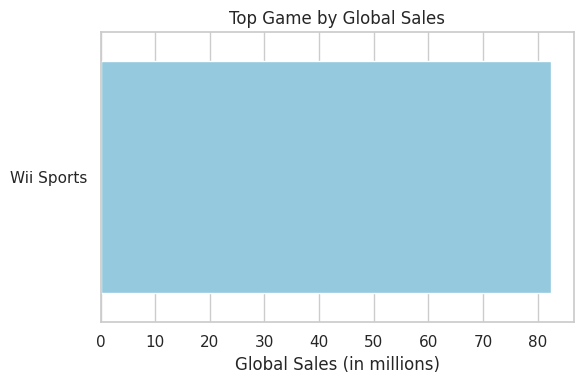

In [15]:
top_game = df.loc[df["Global_Sales"].idxmax()]

# Bar chart to highlight the top game
plt.figure(figsize=(6, 4))
sns.barplot(x=[top_game["Global_Sales"]], y=[top_game["Name"]], color="skyblue")
plt.title("Top Game by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()


Q2: What are the top 10 games by global sales?

<ipython-input-16-1fe015ed9e24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_games, x="Global_Sales", y="Name", palette="magma")


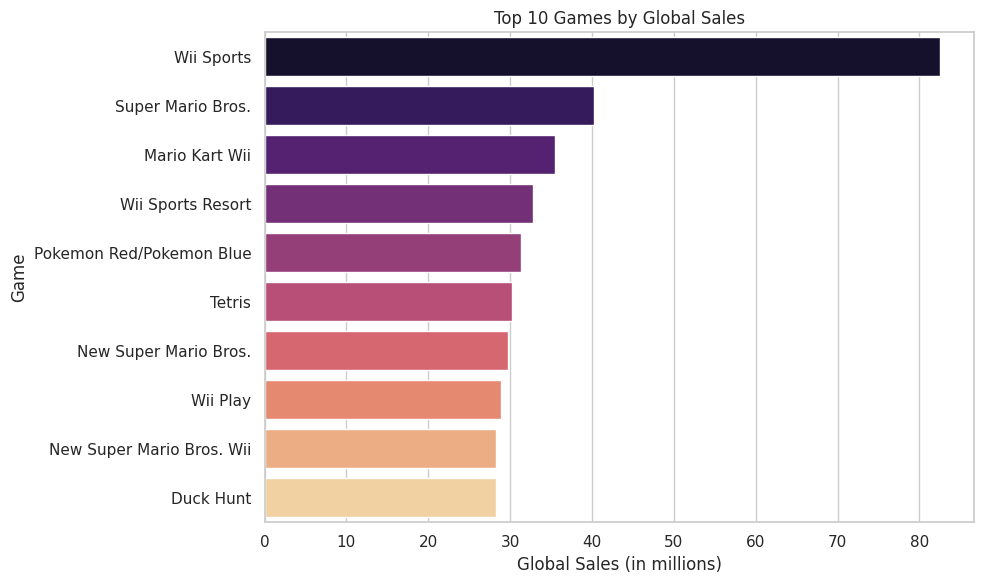

In [16]:
top_10_games = df[["Name", "Global_Sales"]].sort_values(by="Global_Sales", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_games, x="Global_Sales", y="Name", palette="magma")
plt.title("Top 10 Games by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game")
plt.tight_layout()
plt.show()


Q3: Which platform generated the most global sales?

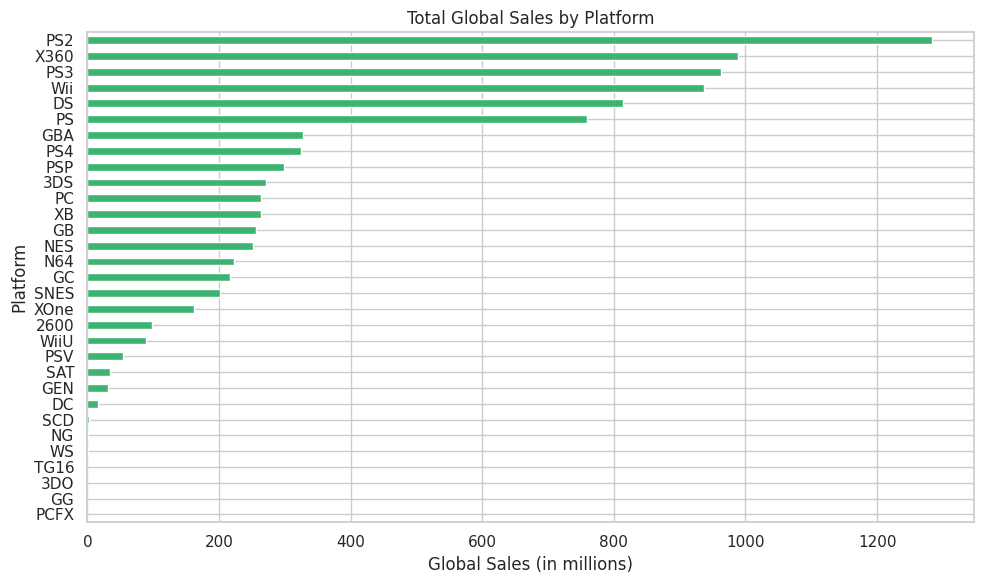

In [17]:
platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
platform_sales.plot(kind='barh', color="mediumseagreen")
plt.title("Total Global Sales by Platform")
plt.xlabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()


 Q4: How have global sales changed over the years?

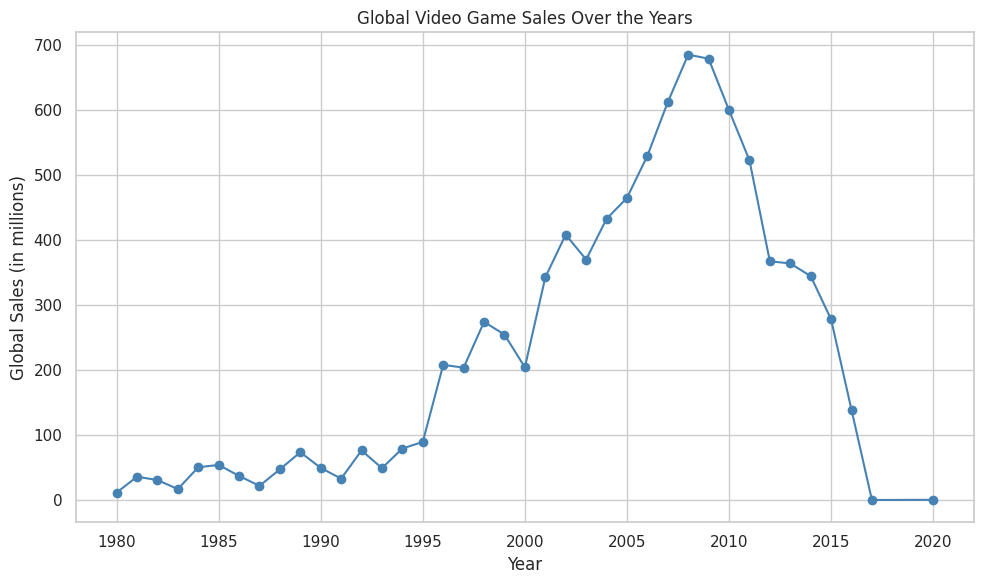

In [18]:
sales_by_year = df.dropna(subset=["Year_of_Release"]).groupby("Year_of_Release")["Global_Sales"].sum()

plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o', color="steelblue")
plt.title("Global Video Game Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.grid(True)
plt.tight_layout()
plt.show()


Q5: Which publisher has the highest total global sales?

<ipython-input-19-35be94420923>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette="Blues_r")


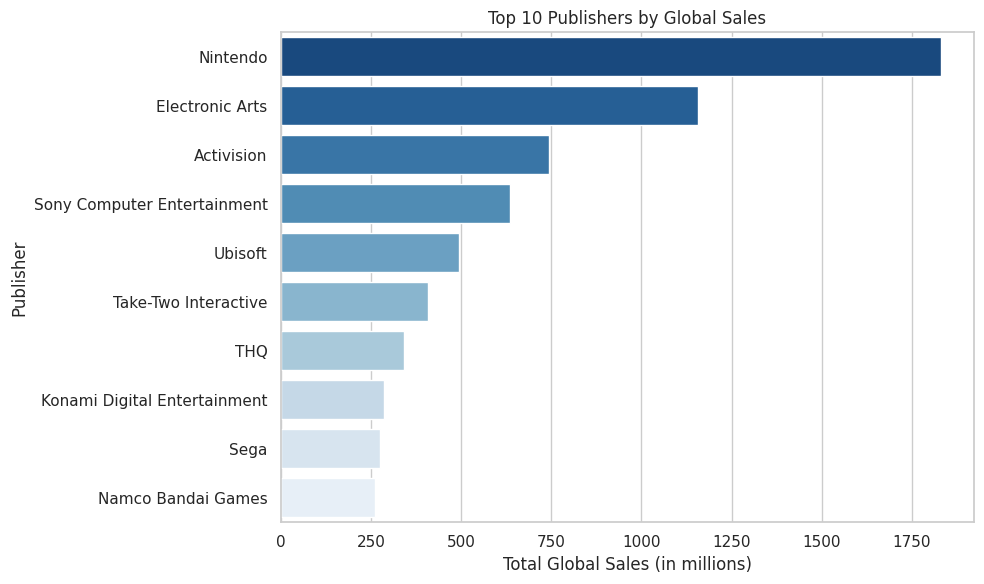

In [19]:
publisher_sales = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette="Blues_r")
plt.title("Top 10 Publishers by Global Sales")
plt.xlabel("Total Global Sales (in millions)")
plt.tight_layout()
plt.show()


Q6: How do sales differ between NA, EU, JP, and other regions?

<ipython-input-20-03307c3e111b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Set2")


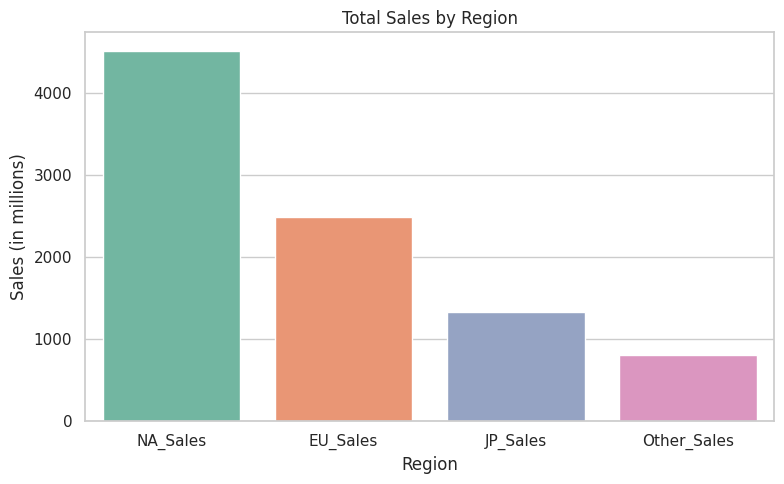

In [20]:
region_sales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Set2")
plt.title("Total Sales by Region")
plt.ylabel("Sales (in millions)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


Q7: Which region contributes the most to global sales?

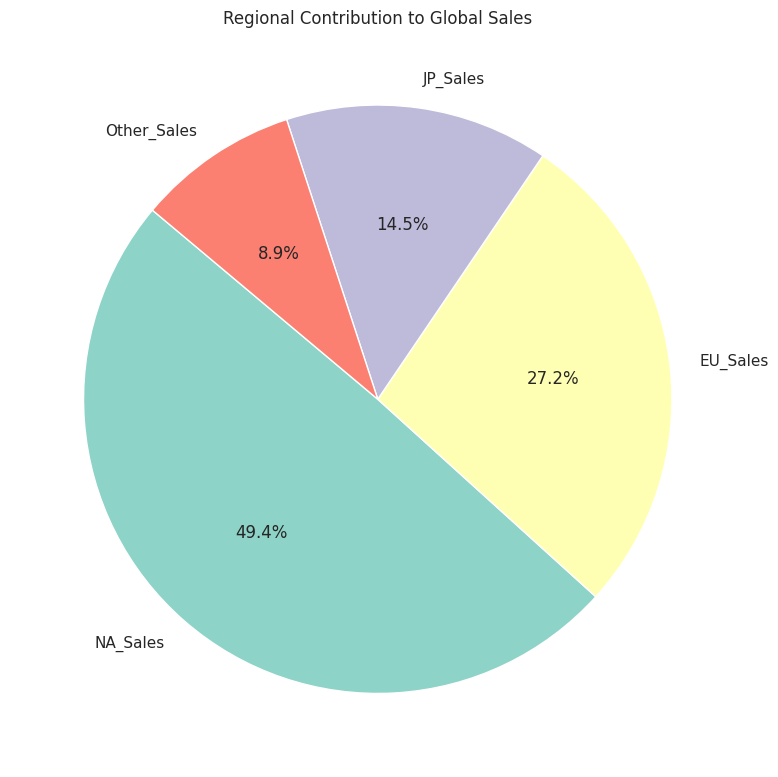

In [21]:
region_sales_percent = (region_sales / region_sales.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(region_sales_percent, labels=region_sales_percent.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Regional Contribution to Global Sales")
plt.tight_layout()
plt.show()


Q8: Are there games that performed well in Japan but poorly elsewhere?

<ipython-input-22-4d458d9d6cee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="JP_Sales", y="Name", data=top_japan_games, palette="flare")


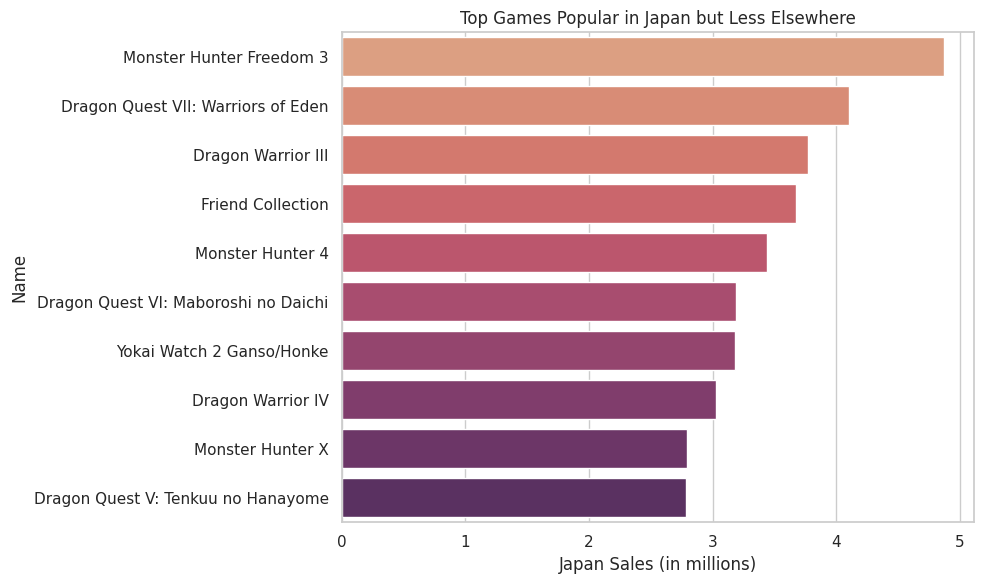

In [22]:
japan_hits = df[(df["JP_Sales"] > 1) & (df["NA_Sales"] < 0.5) & (df["EU_Sales"] < 0.5)]

top_japan_games = japan_hits.sort_values(by="JP_Sales", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="JP_Sales", y="Name", data=top_japan_games, palette="flare")
plt.title("Top Games Popular in Japan but Less Elsewhere")
plt.xlabel("Japan Sales (in millions)")
plt.tight_layout()
plt.show()


Q9: Which platform is most popular in each region?

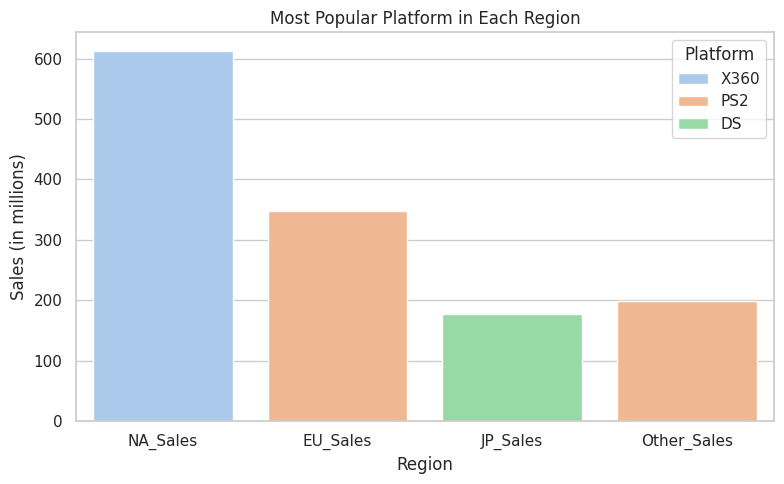

In [23]:
region_platform_sales = df.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

top_per_region = region_platform_sales.idxmax()

plt.figure(figsize=(8, 5))
sns.barplot(x=top_per_region.index, y=[region_platform_sales.loc[top][region] for region, top in top_per_region.items()],
            hue=top_per_region.values, dodge=False, palette="pastel")
plt.title("Most Popular Platform in Each Region")
plt.ylabel("Sales (in millions)")
plt.xlabel("Region")
plt.legend(title="Platform")
plt.tight_layout()
plt.show()


Q10: Which publisher is dominant in each region?

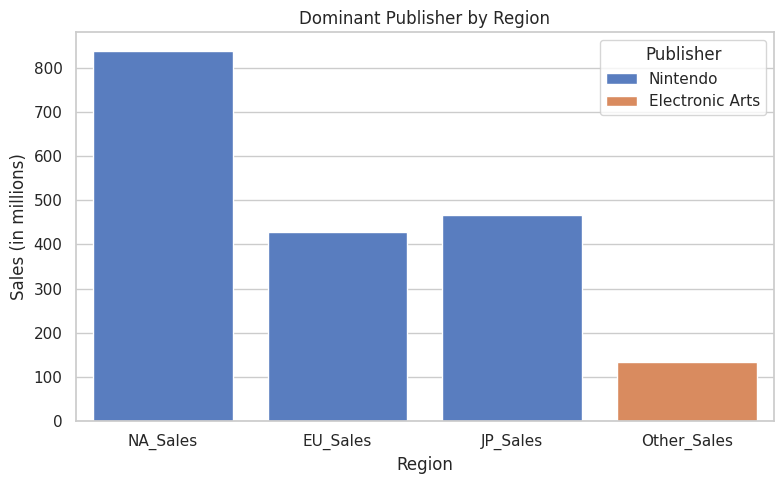

In [24]:
region_publisher_sales = df.groupby("Publisher")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

top_publishers = region_publisher_sales.idxmax()

plt.figure(figsize=(8, 5))
sns.barplot(x=top_publishers.index, y=[region_publisher_sales.loc[top][region] for region, top in top_publishers.items()],
            hue=top_publishers.values, dodge=False, palette="muted")
plt.title("Dominant Publisher by Region")
plt.ylabel("Sales (in millions)")
plt.xlabel("Region")
plt.legend(title="Publisher")
plt.tight_layout()
plt.show()


Q11: What year had the highest number of game releases?

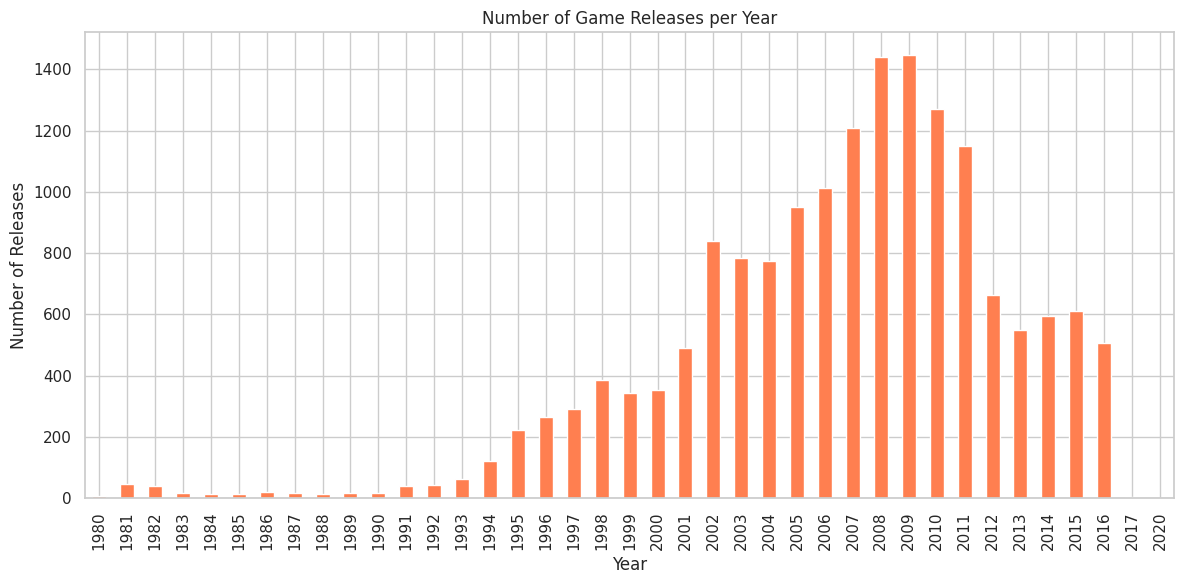

In [25]:
release_counts = df["Year_of_Release"].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(12, 6))
release_counts.plot(kind='bar', color="coral")
plt.title("Number of Game Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.tight_layout()
plt.show()


Q12: How have user and critic scores trended over the years?

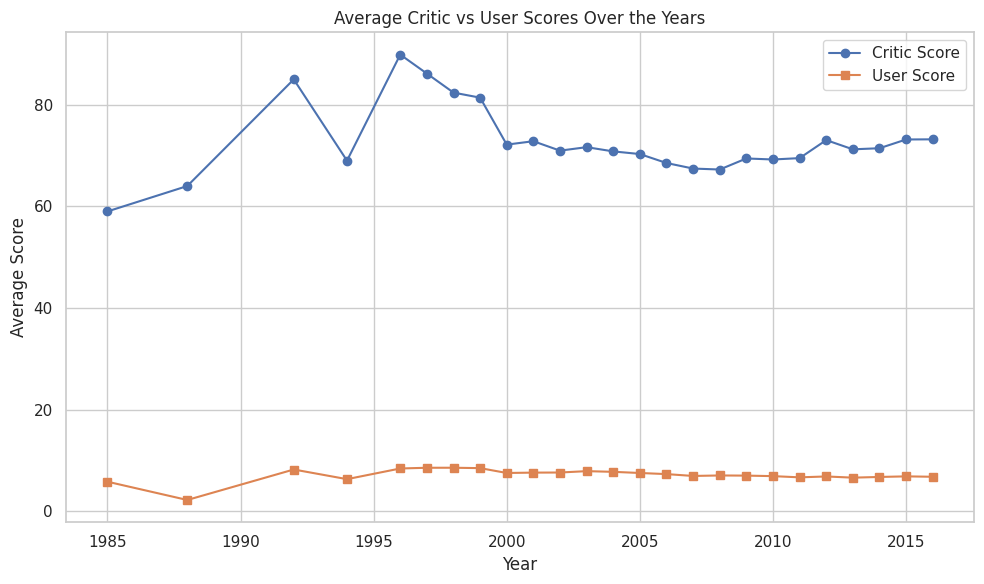

In [26]:
score_trend = df.dropna(subset=["Year_of_Release", "Critic_Score", "User_Score"])
score_trend = score_trend.groupby("Year_of_Release")[["Critic_Score", "User_Score"]].mean()

plt.figure(figsize=(10, 6))
plt.plot(score_trend.index, score_trend["Critic_Score"], label="Critic Score", marker="o")
plt.plot(score_trend.index, score_trend["User_Score"], label="User Score", marker="s")
plt.title("Average Critic vs User Scores Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Q13: Has the average global sales per game increased or decreased over time?

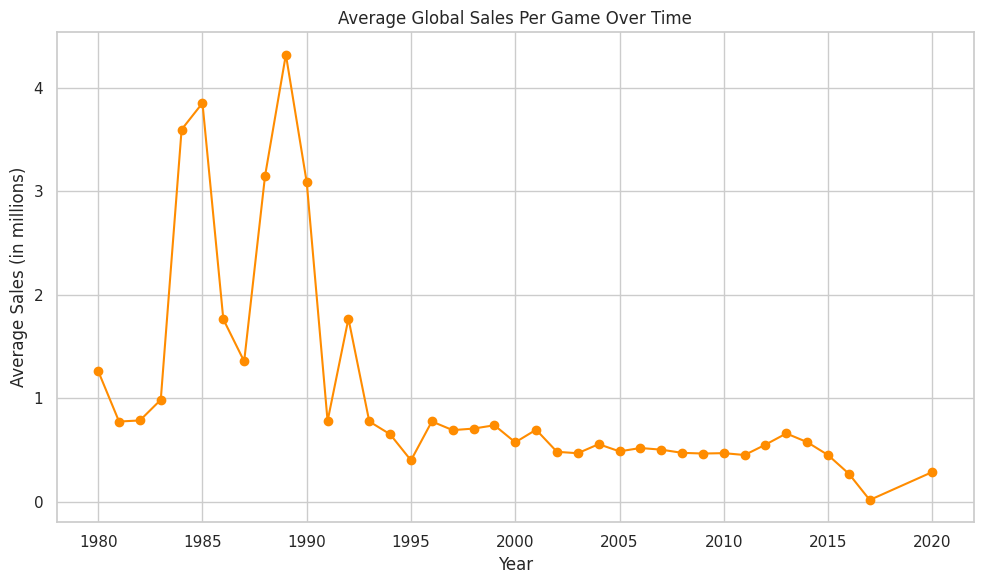

In [27]:
avg_sales_year = df.dropna(subset=["Year_of_Release"]).groupby("Year_of_Release")["Global_Sales"].mean()

plt.figure(figsize=(10, 6))
avg_sales_year.plot(marker='o', color="darkorange")
plt.title("Average Global Sales Per Game Over Time")
plt.xlabel("Year")
plt.ylabel("Average Sales (in millions)")
plt.grid(True)
plt.tight_layout()
plt.show()


Q14: Which genre saw the most growth in the last decade?

<ipython-input-28-b54e462c5f28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_growth.values, y=genre_growth.index, palette="crest")


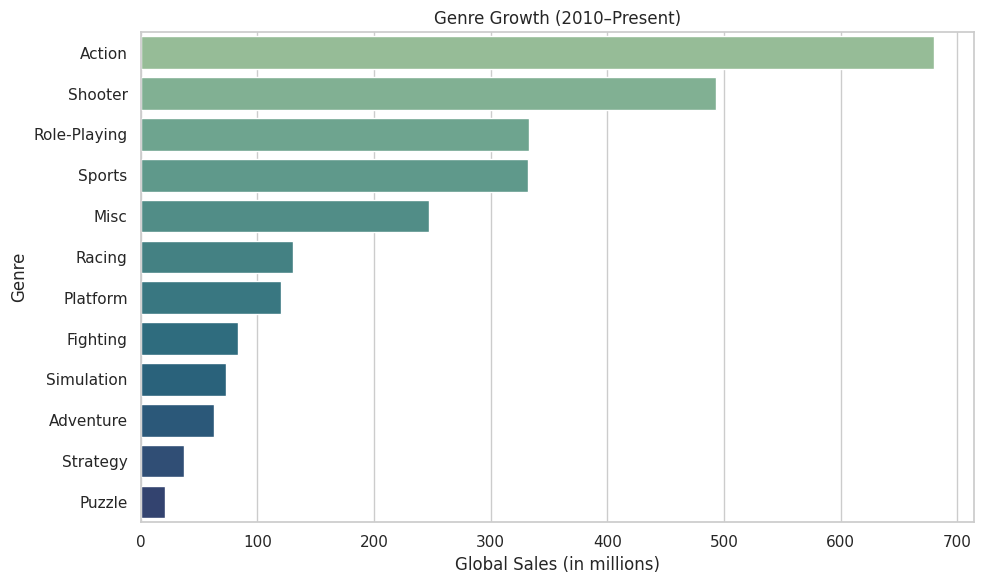

In [28]:
df_recent = df[df["Year_of_Release"] >= 2010]
genre_growth = df_recent.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_growth.values, y=genre_growth.index, palette="crest")
plt.title("Genre Growth (2010–Present)")
plt.xlabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()


Q15: What’s the trend of game releases per platform over time?

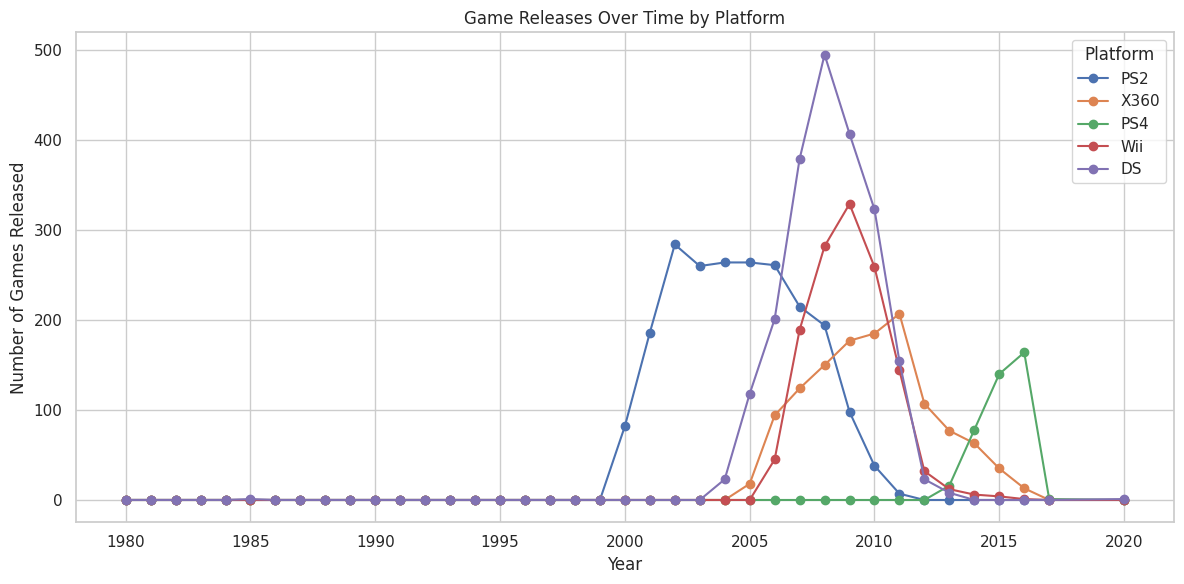

In [29]:
release_trend = df.dropna(subset=["Year_of_Release"]).groupby(["Year_of_Release", "Platform"]).size().unstack(fill_value=0)

# Plot a few key platforms for clarity
key_platforms = ["PS2", "X360", "PS4", "Wii", "DS"]
release_trend[key_platforms].plot(figsize=(12, 6), marker='o')
plt.title("Game Releases Over Time by Platform")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.legend(title="Platform")
plt.tight_layout()
plt.show()


Q16: Which games received the highest critic scores?

<ipython-input-30-3e1bc3a1c3d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Critic_Score", y="Name", data=top_critic_scores, palette="Purples_r")


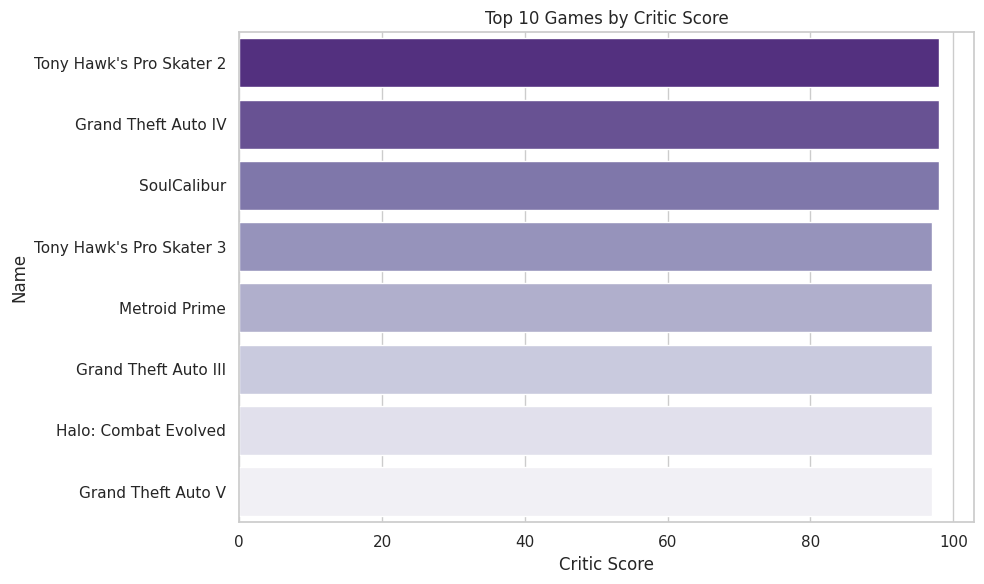

In [30]:
top_critic_scores = df[["Name", "Critic_Score"]].dropna().sort_values(by="Critic_Score", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Critic_Score", y="Name", data=top_critic_scores, palette="Purples_r")
plt.title("Top 10 Games by Critic Score")
plt.xlabel("Critic Score")
plt.tight_layout()
plt.show()


Q17: Which games have the biggest gap between user and critic scores?

<ipython-input-31-9840bcdc5dc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score_Gap", y="Name", data=biggest_gaps, palette="coolwarm")


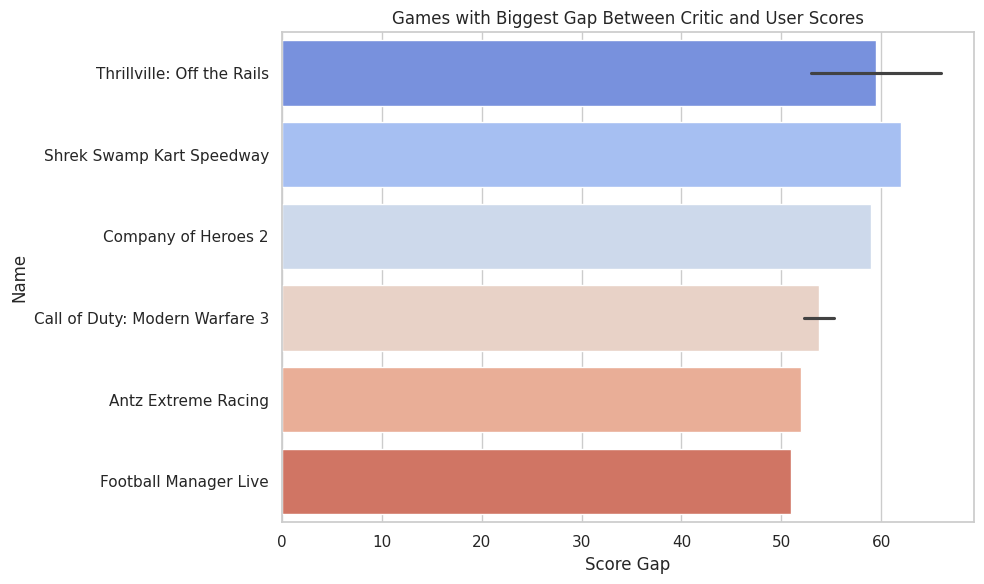

In [31]:
df_gap = df.dropna(subset=["Critic_Score", "User_Score"]).copy()
df_gap["Score_Gap"] = abs(df_gap["Critic_Score"] - df_gap["User_Score"] * 10)
biggest_gaps = df_gap.sort_values("Score_Gap", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Score_Gap", y="Name", data=biggest_gaps, palette="coolwarm")
plt.title("Games with Biggest Gap Between Critic and User Scores")
plt.xlabel("Score Gap")
plt.tight_layout()
plt.show()


Q18: Is there a correlation between review scores and global sales?

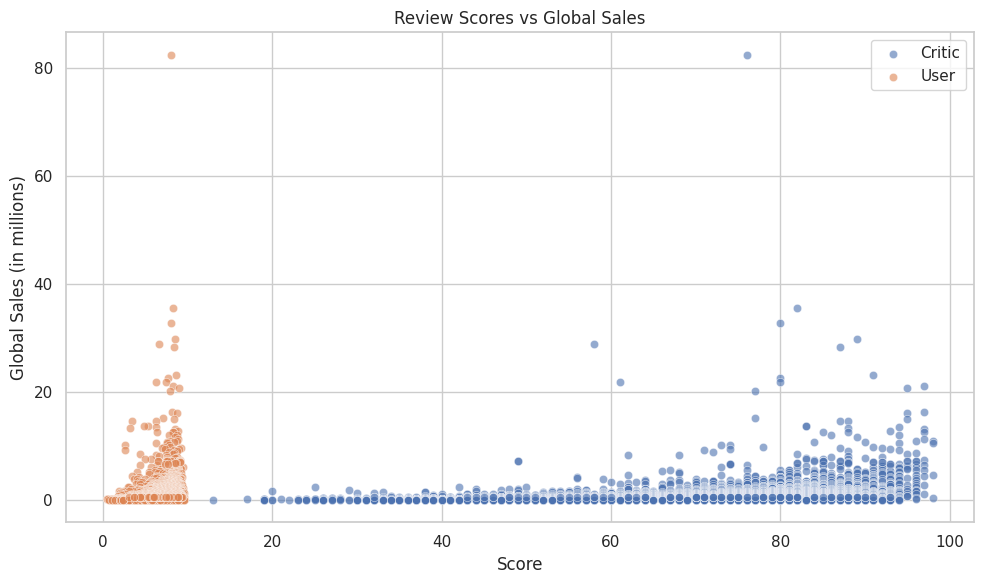

In [32]:
score_sales = df.dropna(subset=["Critic_Score", "User_Score"])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=score_sales, x="Critic_Score", y="Global_Sales", label="Critic", alpha=0.6)
sns.scatterplot(data=score_sales, x="User_Score", y="Global_Sales", label="User", alpha=0.6)
plt.title("Review Scores vs Global Sales")
plt.xlabel("Score")
plt.ylabel("Global Sales (in millions)")
plt.legend()
plt.tight_layout()
plt.show()


Q19: What is the average user score by genre?

<ipython-input-33-f7e6ee9f12a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_user_by_genre.values, y=avg_user_by_genre.index, palette="YlGnBu")


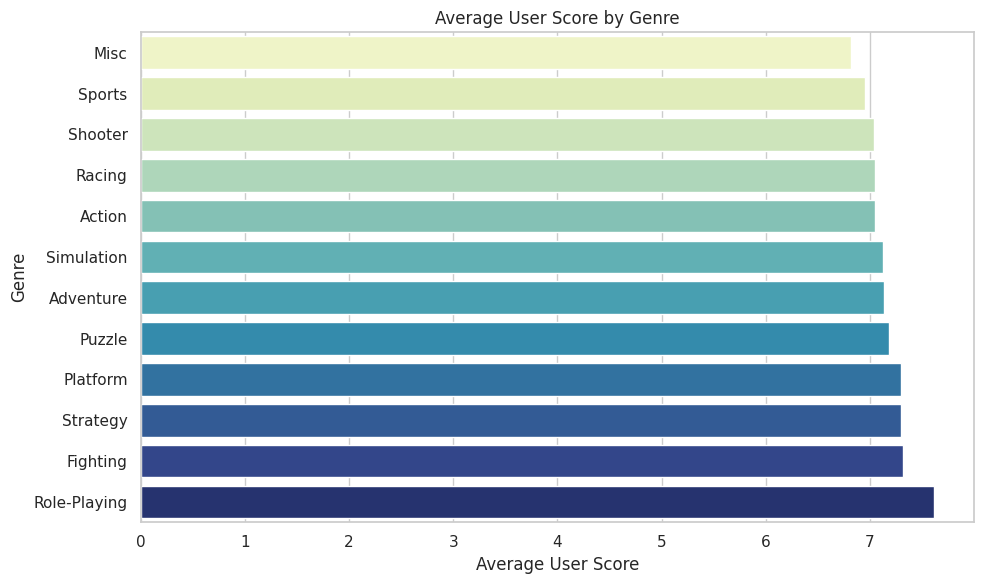

In [33]:
avg_user_by_genre = df.groupby("Genre")["User_Score"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_user_by_genre.values, y=avg_user_by_genre.index, palette="YlGnBu")
plt.title("Average User Score by Genre")
plt.xlabel("Average User Score")
plt.tight_layout()
plt.show()


Q20: Do higher-rated games sell more?

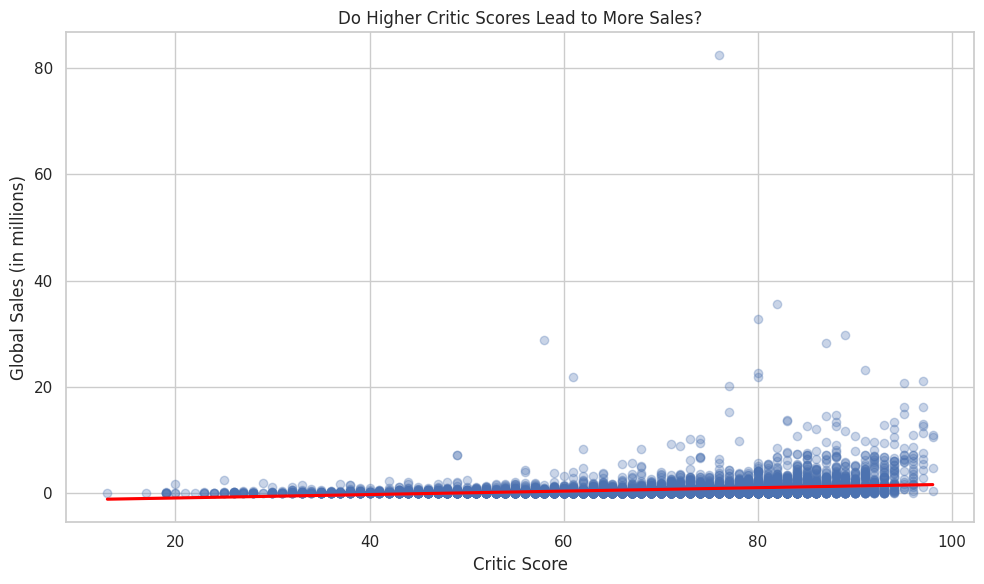

In [34]:
score_sales = df.dropna(subset=["Critic_Score", "Global_Sales"])

plt.figure(figsize=(10, 6))
sns.regplot(data=score_sales, x="Critic_Score", y="Global_Sales", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.title("Do Higher Critic Scores Lead to More Sales?")
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()


Q21: Which genre sells the most globally?

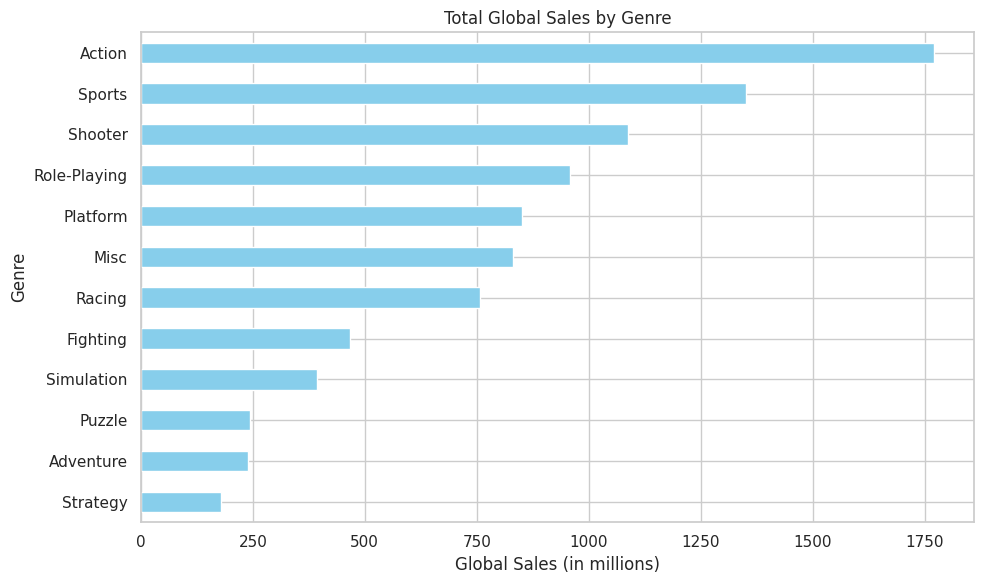

In [35]:
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values()

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='barh', color="skyblue")
plt.title("Total Global Sales by Genre")
plt.xlabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()


Q22: What’s the most popular genre on each platform?

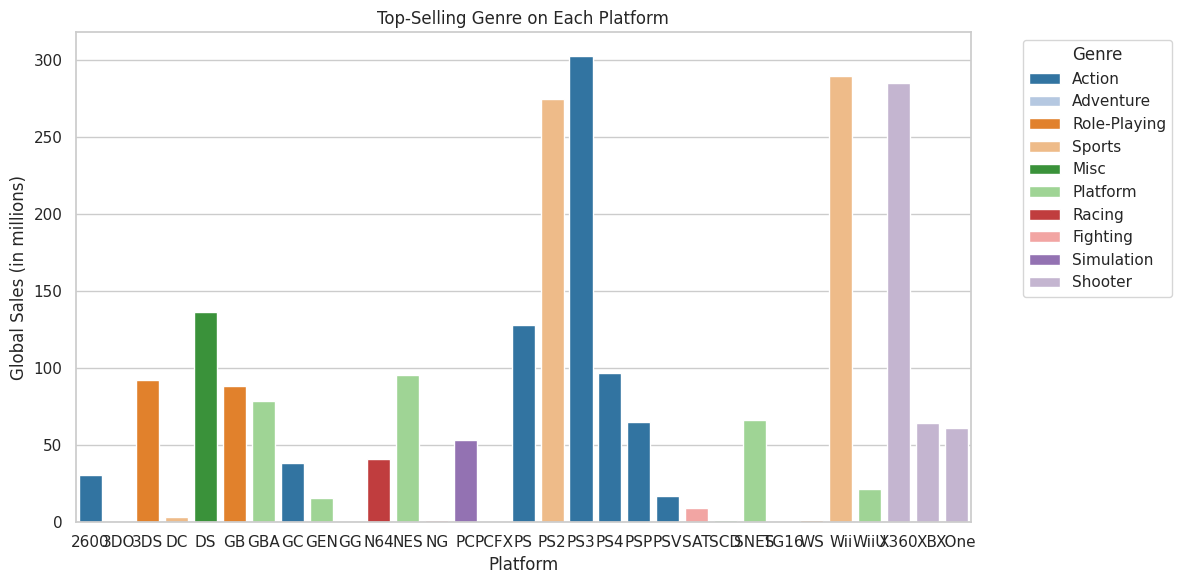

In [36]:
popular_genre_platform = df.groupby(["Platform", "Genre"])["Global_Sales"].sum().reset_index()
idx = popular_genre_platform.groupby("Platform")["Global_Sales"].idxmax()
top_genre_each_platform = popular_genre_platform.loc[idx]

plt.figure(figsize=(12, 6))
sns.barplot(x="Platform", y="Global_Sales", hue="Genre", data=top_genre_each_platform, dodge=False, palette="tab20")
plt.title("Top-Selling Genre on Each Platform")
plt.xlabel("Platform")
plt.ylabel("Global Sales (in millions)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Q23: How do different genres perform across regions?

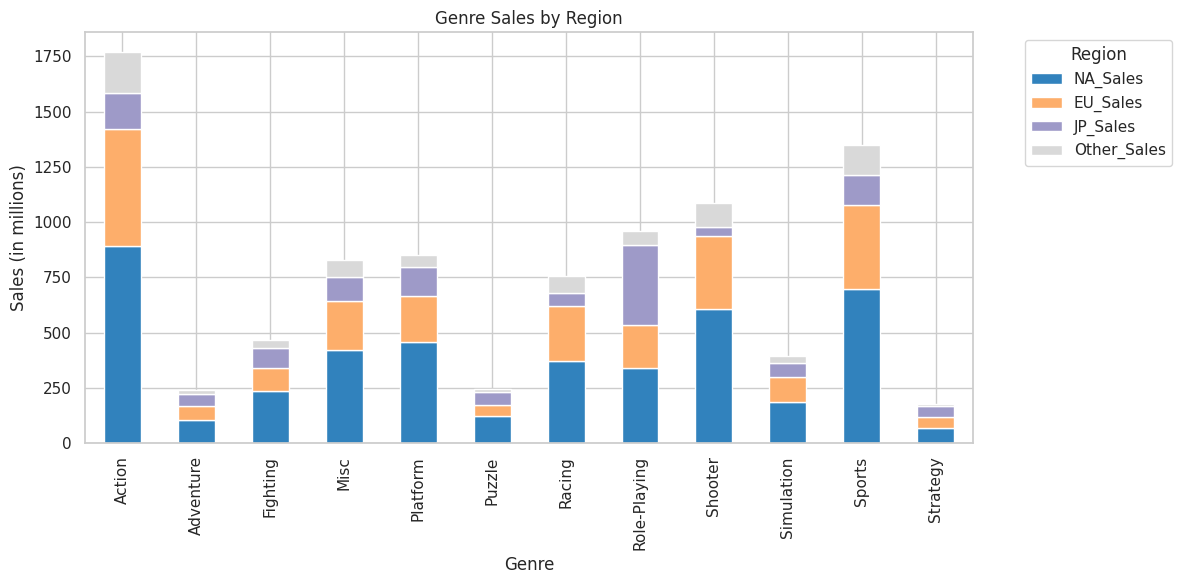

In [37]:
genre_region = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

genre_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="tab20c")
plt.title("Genre Sales by Region")
plt.xlabel("Genre")
plt.ylabel("Sales (in millions)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Q24: Which genre has the highest average review score?

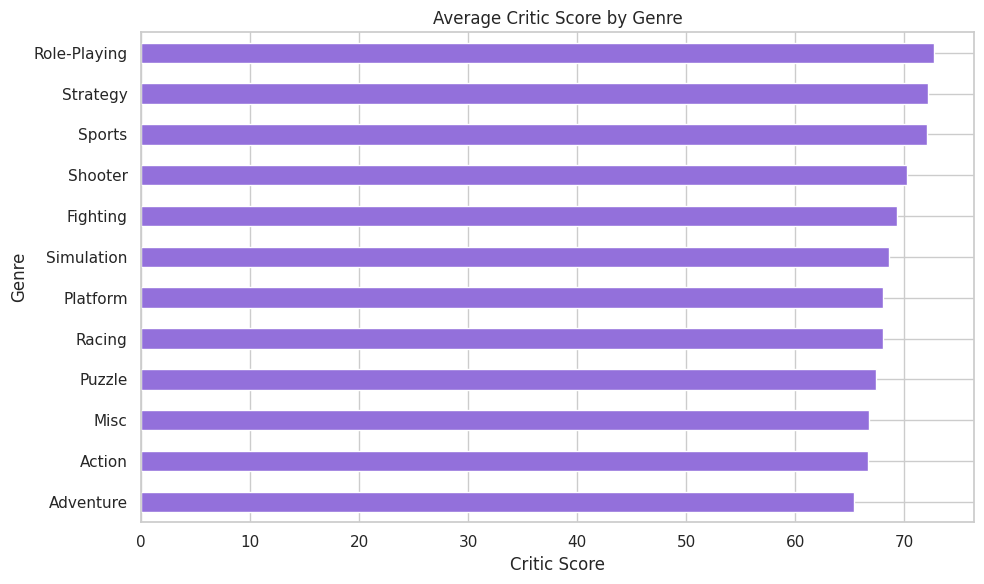

In [38]:
avg_score_by_genre = df.groupby("Genre")[["Critic_Score", "User_Score"]].mean().sort_values("Critic_Score")

plt.figure(figsize=(10, 6))
avg_score_by_genre["Critic_Score"].plot(kind='barh', color="mediumpurple")
plt.title("Average Critic Score by Genre")
plt.xlabel("Critic Score")
plt.tight_layout()
plt.show()


Q25: What’s the most common genre among top 100 games by sales?

<ipython-input-39-0b0bab080ad7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="BuGn_r")


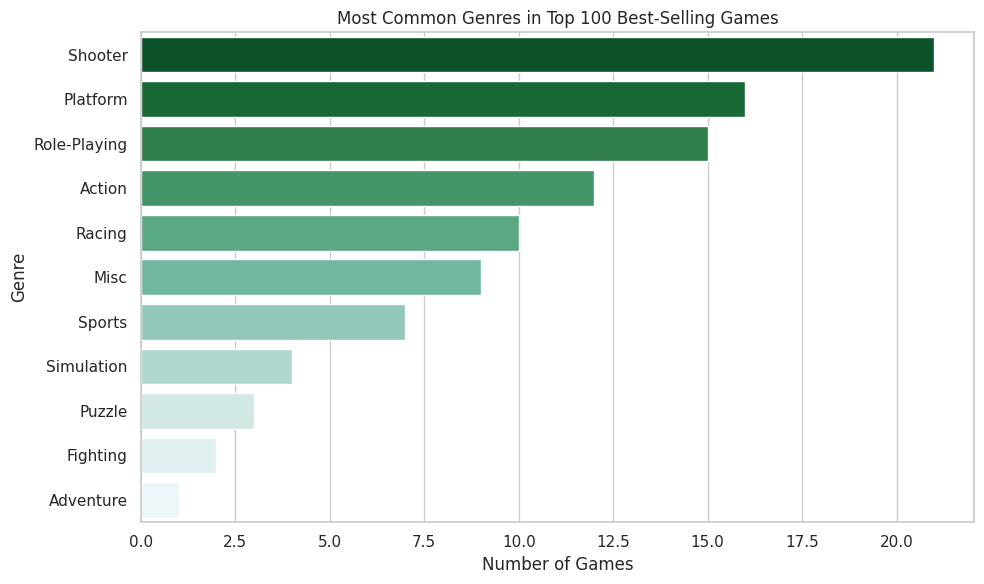

In [39]:
top_100 = df.sort_values("Global_Sales", ascending=False).head(100)
genre_counts = top_100["Genre"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="BuGn_r")
plt.title("Most Common Genres in Top 100 Best-Selling Games")
plt.xlabel("Number of Games")
plt.tight_layout()
plt.show()


Q26: Which publisher released the most games?

<ipython-input-40-5b8610db0092>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="autumn")


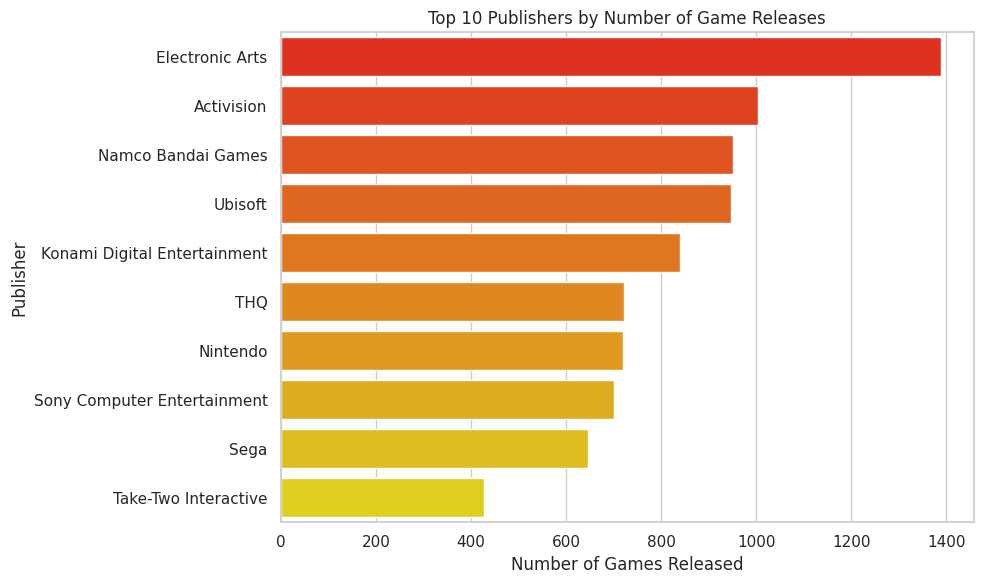

In [40]:
publisher_counts = df["Publisher"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="autumn")
plt.title("Top 10 Publishers by Number of Game Releases")
plt.xlabel("Number of Games Released")
plt.tight_layout()
plt.show()


Q27: Which publisher has the highest average user score?

<ipython-input-45-e2983e0de25e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_avg.values, y=filtered_avg.index, palette="cubehelix")


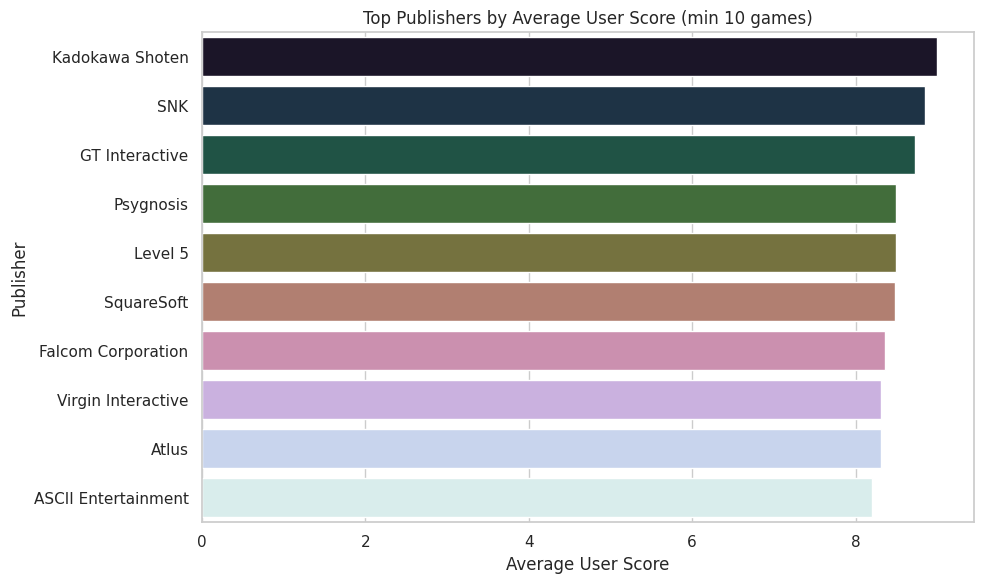

In [45]:
# Calculate average user score per publisher
avg_user_score = df.groupby("Publisher")["User_Score"].mean()

# Count number of games per publisher
publisher_counts = df["Publisher"].value_counts()

# Filter publishers with at least 10 games
valid_publishers = publisher_counts[publisher_counts >= 10].index
filtered_avg = avg_user_score.loc[valid_publishers].sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_avg.values, y=filtered_avg.index, palette="cubehelix")
plt.title("Top Publishers by Average User Score (min 10 games)")
plt.xlabel("Average User Score")
plt.tight_layout()
plt.show()


Q28: Which publisher dominates in each genre?

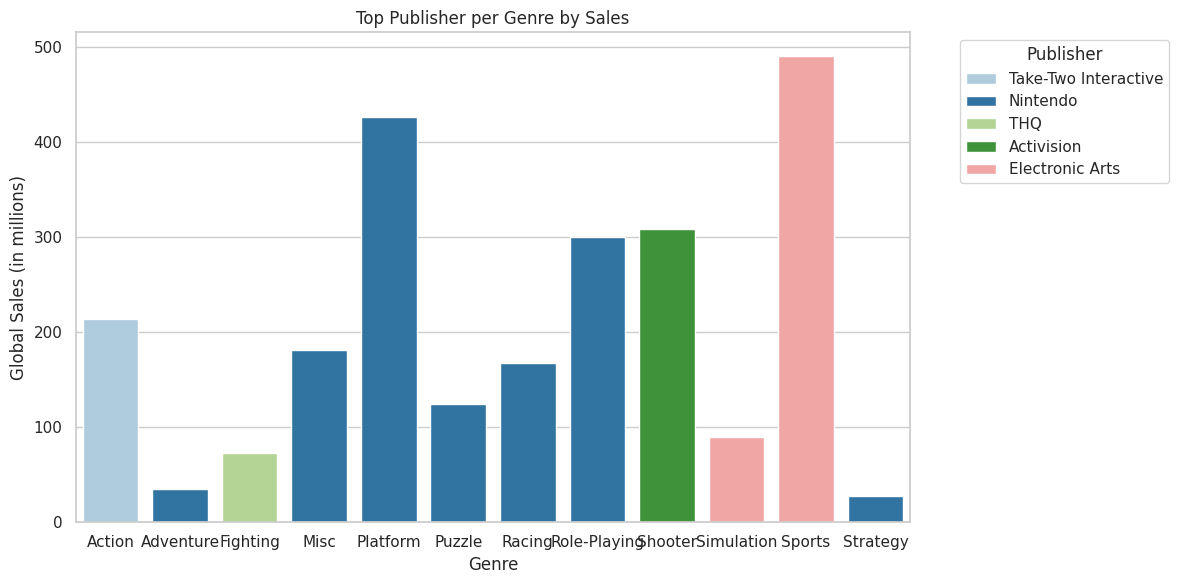

In [42]:
dom_genre_pub = df.groupby(["Genre", "Publisher"])["Global_Sales"].sum().reset_index()
idx = dom_genre_pub.groupby("Genre")["Global_Sales"].idxmax()
top_pubs_per_genre = dom_genre_pub.loc[idx]

plt.figure(figsize=(12, 6))
sns.barplot(x="Genre", y="Global_Sales", hue="Publisher", data=top_pubs_per_genre, dodge=False, palette="Paired")
plt.title("Top Publisher per Genre by Sales")
plt.ylabel("Global Sales (in millions)")
plt.xlabel("Genre")
plt.legend(title="Publisher", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Q29: What’s the sales distribution among the top 5 publishers?

<ipython-input-43-8ddf3680b8c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Publisher", y="Global_Sales", data=top_5_df, palette="Set3")


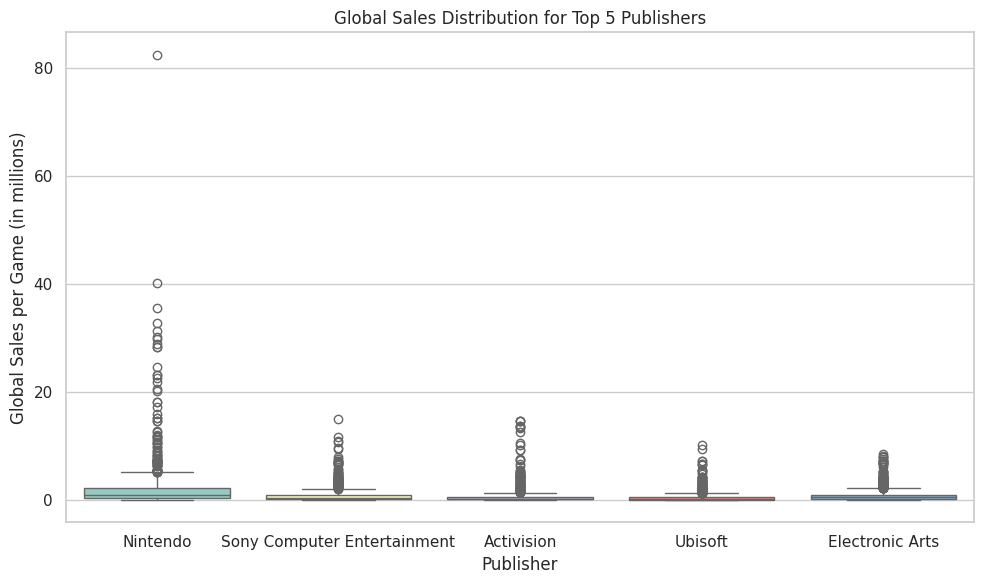

In [43]:
top_5_publishers = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(5)
top_5_df = df[df["Publisher"].isin(top_5_publishers.index)]

plt.figure(figsize=(10, 6))
sns.boxplot(x="Publisher", y="Global_Sales", data=top_5_df, palette="Set3")
plt.title("Global Sales Distribution for Top 5 Publishers")
plt.ylabel("Global Sales per Game (in millions)")
plt.tight_layout()
plt.show()


Q30: Do certain publishers consistently get better reviews?

<ipython-input-44-1228b285075c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_review_pubs["Combined"], y=top_review_pubs.index, palette="cool")


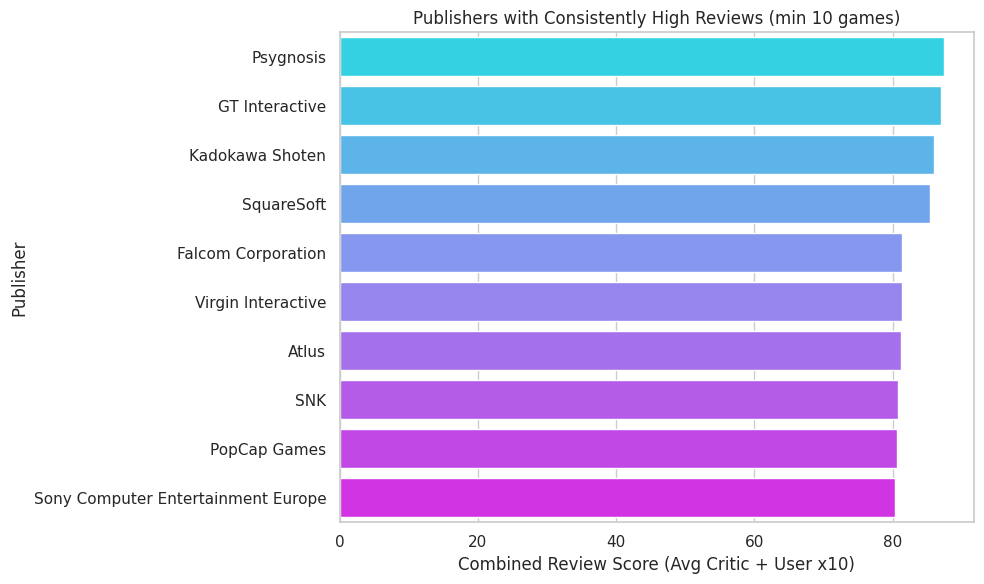

In [44]:
review_consistency = df.groupby("Publisher")[["Critic_Score", "User_Score"]].mean().dropna()
review_consistency["Combined"] = (review_consistency["Critic_Score"] + review_consistency["User_Score"] * 10) / 2
top_review_pubs = review_consistency[review_consistency.index.map(df["Publisher"].value_counts()) > 10].sort_values("Combined", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_review_pubs["Combined"], y=top_review_pubs.index, palette="cool")
plt.title("Publishers with Consistently High Reviews (min 10 games)")
plt.xlabel("Combined Review Score (Avg Critic + User x10)")
plt.tight_layout()
plt.show()
